In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

## 1. Import data sets and Load data set

In [2]:
df = pd.read_csv("bank - bank.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### 2.(a) Identify the Features data types before entering into the analysis

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### (b) Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once

In [6]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("")

age
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

marital
['married' 'single' 'divorced']

education
['primary' 'secondary' 'tertiary' 'unknown']

default
['no' 'yes']

balance
[ 1787  4789  1350 ...  -333 -3313  1137]

housing
['no' 'yes']

loan
['no' 'yes']

contact
['cellular' 'unknown' 'telephone']

day
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]

month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

duration
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74  897   81   40  958  354  150   97  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


### (c) Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### (d) Find duplicates 

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

### 3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

In [11]:
for i in df['y']:
    if i == "no":
        df["y"]=df["y"].replace(to_replace = 'no', value = "non_subscribed")
    else:
        df["y"]=df["y"].replace(to_replace = 'yes', value = "subscribed")

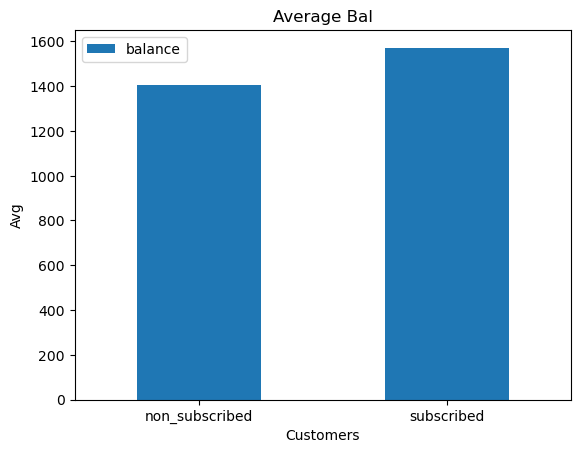

In [12]:
pivot = pd.pivot_table(data=df,values="balance",index="y",aggfunc="mean")
pivot.plot(kind="bar")
plt.title("Average Bal")
plt.xlabel("Customers")
plt.ylabel("Avg")
plt.xticks(rotation=0)
plt.show()

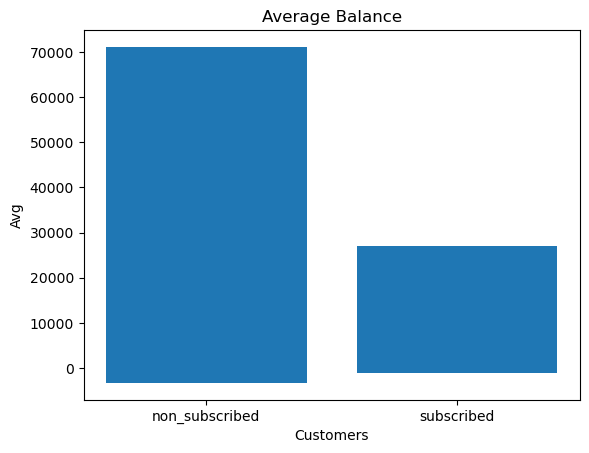

In [13]:
plt.bar(df["y"],df["balance"])
plt.title("Average Balance")
plt.xlabel("Customers")
plt.ylabel("Avg")
plt.show()

### 4. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

In [14]:
a = df["education"].value_counts()
a

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [15]:
a.index

Index(['secondary', 'tertiary', 'primary', 'unknown'], dtype='object')

In [16]:
a.values

array([2306, 1350,  678,  187], dtype=int64)

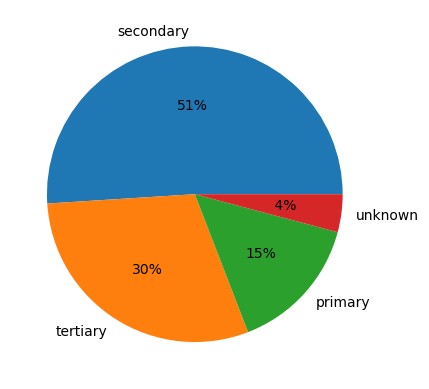

In [17]:
plt.pie(a.values, labels = a.index, autopct = "%2.f%%")
plt.show()

### 5. Create a function that should be able to create a new feature(Variable) called season using the month column.

In [18]:
def create_season(df):
    df["Seasons"]=df["month"].apply(lambda x: get_season(x))
    return df

In [19]:
def get_season(mo):
    if mo in ["dec","jan","feb"]:
        return "winter"
    elif mo in ["mar","apr","may"]:
        return "spring"
    elif mo in ["jun","jul","aug"]:
        return "summer"
    else:
        return "autumn"

In [20]:
create_season(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,non_subscribed,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,non_subscribed,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,non_subscribed,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,non_subscribed,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,non_subscribed,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,non_subscribed,summer
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,non_subscribed,spring
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,non_subscribed,summer
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,non_subscribed,winter


In [21]:
df["month"].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,non_subscribed,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,non_subscribed,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,non_subscribed,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,non_subscribed,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,non_subscribed,spring


## 6.  Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.


<Axes: xlabel='Seasons', ylabel='count'>

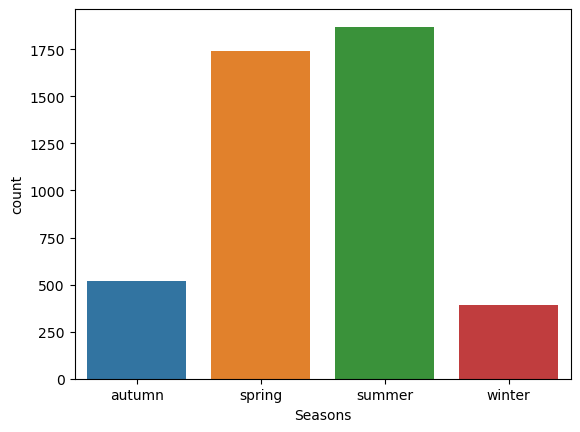

In [23]:
sns.countplot(data=df,x = "Seasons")


<Axes: xlabel='Seasons', ylabel='count'>

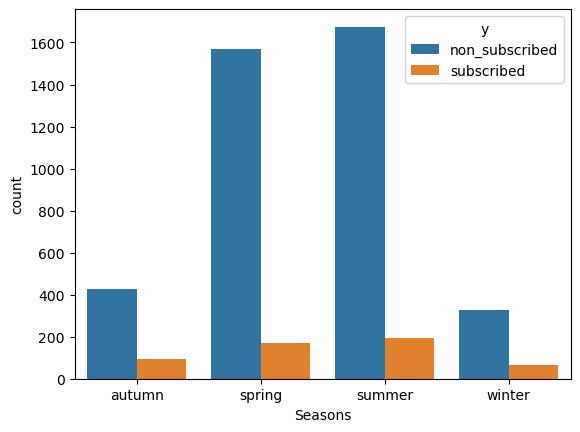

In [24]:
sns.countplot(data=df,x="Seasons",hue = "y")

## 7. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

In [25]:
pdays_counts=df.groupby(by = "pdays")["y"].value_counts()

In [26]:
pdays_counts


pdays  y             
-1     non_subscribed    3368
       subscribed         337
 1     subscribed           2
 2     non_subscribed       7
 3     non_subscribed       1
                         ... 
 687   non_subscribed       1
 761   subscribed           1
 804   subscribed           1
 808   non_subscribed       1
 871   non_subscribed       1
Name: y, Length: 371, dtype: int64

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,non_subscribed,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,non_subscribed,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,non_subscribed,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,non_subscribed,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,non_subscribed,spring


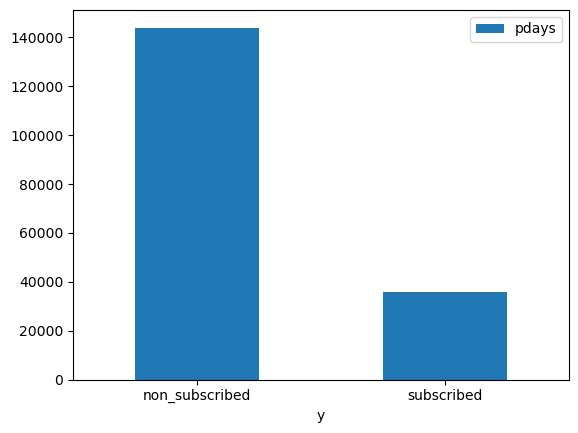

In [28]:
df1=pd.pivot_table(data=df,values = "pdays",index = "y",aggfunc = "sum")
df1.plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

## 8. Replace the -1 as nan values from pdays.

In [29]:
df1["pdays"] = df1["pdays"].replace(-1, np.nan)

In [30]:
df1.head()

,pdays
y,
non_subscribed,144024
subscribed,35761


## 9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9.

In [31]:
ydf=pd.pivot_table(data = df,values = "pdays",index = 'y', aggfunc= "sum")
ydf

,pdays
y,
non_subscribed,144024
subscribed,35761


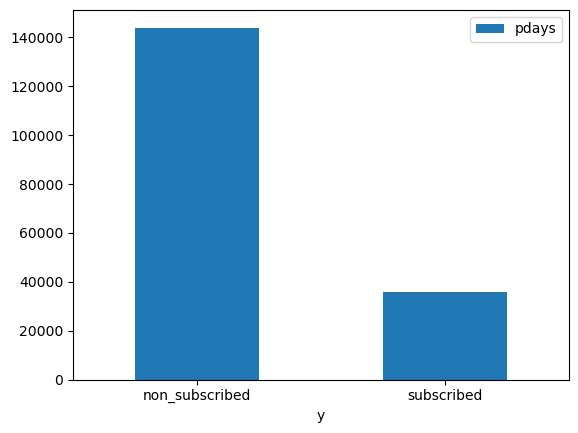

In [32]:
ydf.plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

## 10. Does the customer take the term subscription who has less than 0 balance?
Hint: Use any kind of plot which would you the related information to this question.

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,non_subscribed,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,non_subscribed,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,non_subscribed,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,non_subscribed,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,non_subscribed,spring


In [34]:
dnd = df[df['balance'] < 0]
dnd['y'].value_counts()

non_subscribed    335
subscribed         31
Name: y, dtype: int64

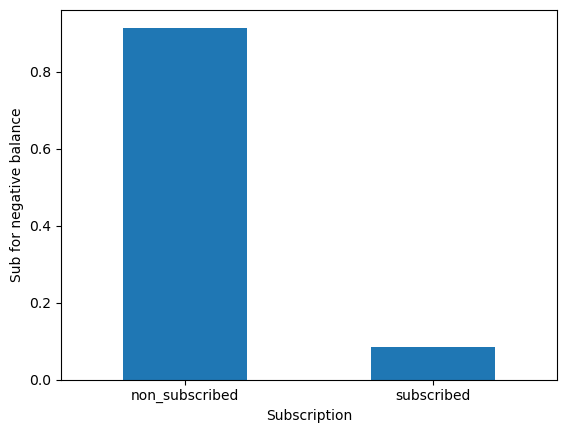

In [35]:
dnd = df.loc[df['balance'] < 0]
subt = dnd['y'].value_counts(normalize = True)
subt.plot(kind="bar")
plt.xlabel("Subscription")
plt.ylabel("Sub for negative balance")
plt.xticks(rotation=0)
plt.show()

## 11. Use Pivot table to find the maximum balance for each type of job.

In [36]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,non_subscribed,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,non_subscribed,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,non_subscribed,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,non_subscribed,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,non_subscribed,spring


In [37]:
pd.pivot_table(data=df, index = "job",
              values = "balance",
              aggfunc = "max")

,balance
job,
admin.,22171
blue-collar,16353
entrepreneur,42045
housemaid,26965
management,27359
retired,71188
self-employed,16430
services,26394
student,11555


## 12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

<Axes: xlabel='age', ylabel='balance'>

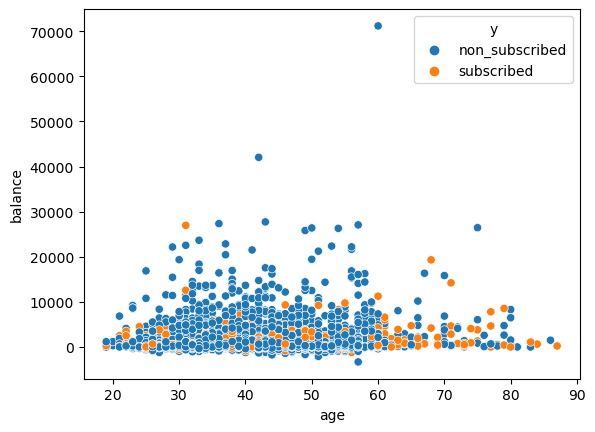

In [38]:
sns.scatterplot(data=df, x = "age", y = "balance", hue = "y")

## 13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.

<Axes: xlabel='y', ylabel='balance'>

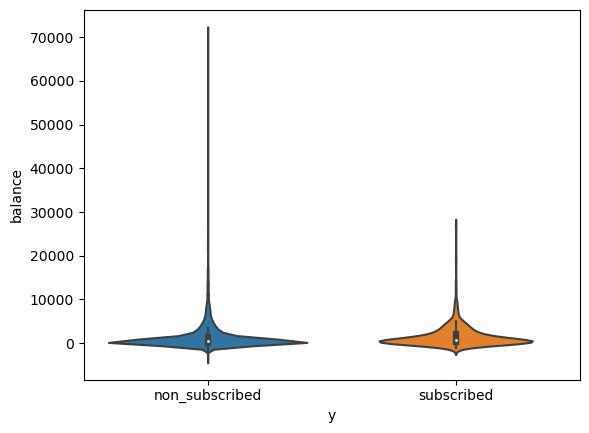

In [39]:
sns.violinplot(data = df,
              x = "y",
              y = "balance")

<Axes: xlabel='y', ylabel='balance'>

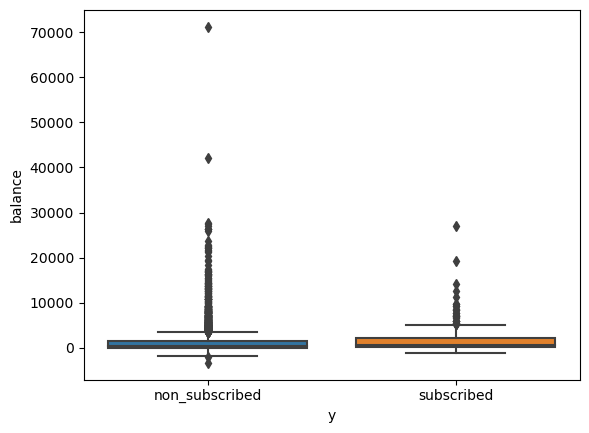

In [40]:
sns.boxplot(data = df,
           x = "y",
           y = "balance")

## 14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.
Note: Try to explore more parameters that are there in the pie-plot method.

In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,non_subscribed,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,non_subscribed,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,non_subscribed,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,non_subscribed,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,non_subscribed,spring


In [42]:
for i in df['default']:
    if i == "no":
        df["default"]=df["default"].replace(to_replace = 'no', value = "non_defaulters")
    else:
        df["default"]=df["default"].replace(to_replace = 'yes', value = "defaulters")

In [43]:
b = df["default"].value_counts()
b

non_defaulters    4445
defaulters          76
Name: default, dtype: int64

In [44]:
b.index

Index(['non_defaulters', 'defaulters'], dtype='object')

In [45]:
b.values

array([4445,   76], dtype=int64)

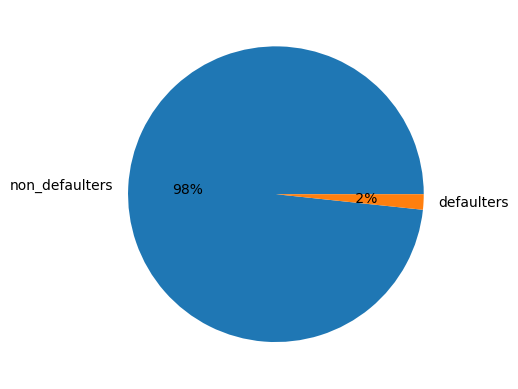

In [46]:
plt.pie(b.values, labels = b.index, autopct = "%2.f%%")
plt.show()

## 15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

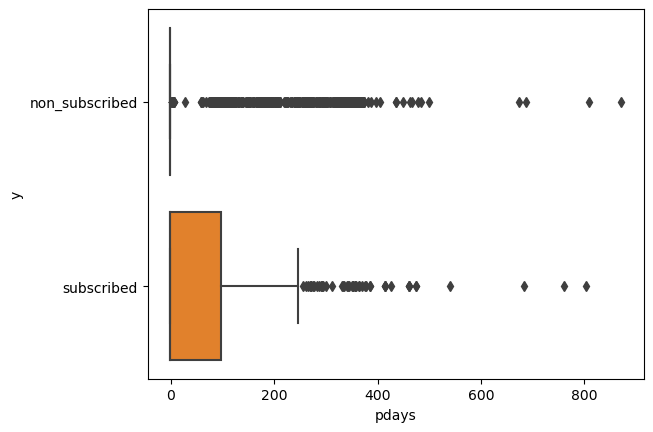

In [47]:
sns.boxplot(data = df, x = "pdays",
           y = "y")
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='y', ylabel='pdays'>

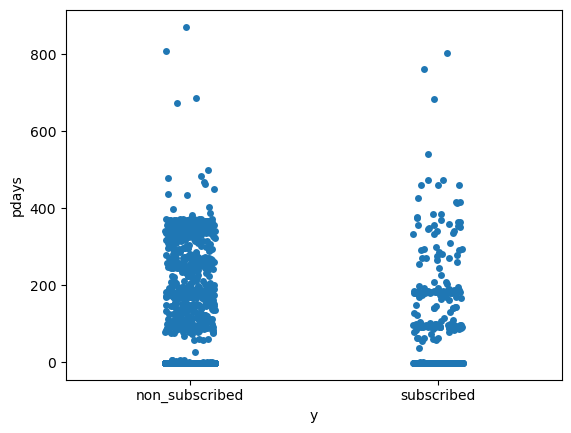

In [48]:
sns.stripplot(data=df, x = "y",
             y = "pdays")

In [49]:
df.y.value_counts()

non_subscribed    4000
subscribed         521
Name: y, dtype: int64